In [16]:
import warnings
from typing import Dict, List, Tuple, Union
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import scipy.linalg as slin
import scipy.optimize as sopt
import networkx as nx


import matplotlib.pyplot as plt

from causalnex.structure import StructureModel
from causalnex.structure.transformers import DynamicDataTransformer
from causalnex.structure import dynotears

In [17]:
dataframe = "/Users/shobhit/UCSD Edu/Sem 5/Responsible Data Science/simulated.csv"

In [18]:
data = pd.read_csv(dataframe)

In [19]:
data.head()

,D Particles,X Position,Y Position,Z Position,X Velocity,Y Velocity,Z Velocity,T Velocity
0,483251.719035,11.638292,9.538292,14.546792,11.789646,8.269146,14.869146,33.220500
1,446941.795830,11.784561,9.657882,14.661954,10.887374,7.635539,13.686931,30.483099
2,438878.127106,11.720995,9.604500,14.575468,10.755492,7.542838,13.520191,30.110741
3,403289.008823,11.767937,9.643696,14.572445,9.948701,6.978167,12.467996,27.674766
4,333786.459541,10.088194,8.254104,12.490500,9.478745,6.655047,11.966054,26.723226


In [20]:

# Optional: Handle missing values, for example, by dropping them
data_cleaned = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)


In [21]:
from causalnex.structure.dynotears import from_pandas_dynamic

# Specify the maximum lag to consider for dynamic relationships
max_lag = 2  # Adjust based on your data and domain knowledge

# Learn the dynamic causal structure
structure_model = from_pandas_dynamic(data_normalized, p=max_lag)


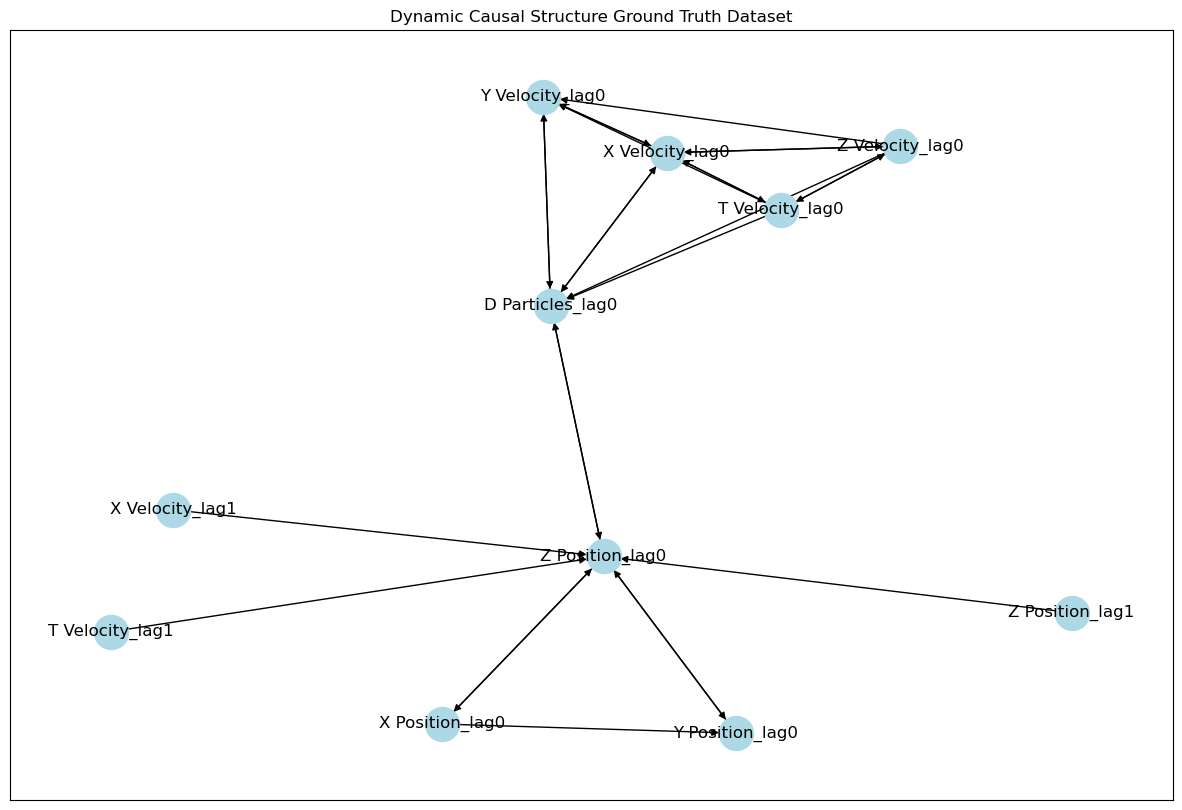

In [22]:
graph = nx.DiGraph(structure_model.edges)
plt.figure(figsize=(15,10))
nx.draw_networkx(graph, with_labels=True, node_size=600, node_color="lightblue")
plt.title('Dynamic Causal Structure Ground Truth Dataset')
plt.show()

In [23]:
import networkx as nx
from typing import Dict, List, Union
def extract_graph_scores(graph: nx.DiGraph) -> Dict[str, Union[int, float]]:
    scores = {
        "num_edges": graph.number_of_edges(),
        "average_clustering": nx.average_clustering(nx.Graph(graph)),  # Convert to undirected graph for clustering
        "average_shortest_path_length": nx.average_shortest_path_length(graph) if nx.is_weakly_connected(graph) else float('inf'),
    }
    return scores

# Usage with your graph:
graph_scores = extract_graph_scores(graph)
print(graph_scores)


{'num_edges': 26, 'average_clustering': 0.606060606060606, 'average_shortest_path_length': 1.5818181818181818}
